<a href="https://colab.research.google.com/github/danirojas-nicole/stonedredliningpubpol2130/blob/Individual-Code-Notebooks/Chengqi_Zhao(cz565)_Redlining_and_Dispensaries_Final_Coding_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%config InlineBackend.figure_formats = ["retina"]

In [ ]:
!pip install -q geopandas seaborn folium census
# This installs the census package.
!pip install census
# This specifies US from the census package.
!pip install us

In [ ]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from branca.utilities import color_brewer

# Importing census package, import states, make sure pandas library is imported, and import os to make automated functions easier.
from census import Census
from us import states
import os

# Added in for geocoding.
import requests

# Redlining

In [ ]:
census = Census("", year=2020)

In [ ]:
hri_gdf = gpd.read_file("https://raw.githubusercontent.com/PUBPOL-2130/notebooks/refs/heads/main/data/HRI2020.zip")

In [ ]:
hri_gdf

,OBJECTID_1,OBJECTID,GEOID20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,Shape_Leng,EQINTER20,Shape_Le_1,Shape_Area,HRI2020,RHRI2020,geometry
0,0,1,01097001502,848502.0,0.0,+30.6568785,-088.0688375,33681.0,"Mobile, AL",0.043989,4,0.043989,0.000080,3.924200,3.9,"POLYGON ((-88.07488 30.64997, -88.07459 30.650..."
1,0,3,01073004502,2953269.0,0.0,+33.5071040,-086.8031176,13820.0,"Birmingham-Hoover, AL",0.077309,4,0.077309,0.000287,3.939468,3.9,"POLYGON ((-86.81747 33.50731, -86.8174 33.5073..."
2,0,4,01073004501,723960.0,0.0,+33.4983380,-086.8072523,13820.0,"Birmingham-Hoover, AL",0.039856,4,0.039856,0.000070,3.551947,3.6,"POLYGON ((-86.81556 33.49672, -86.81517 33.497..."
3,0,6,01073002402,4990907.0,0.0,+33.5299121,-086.7865984,13820.0,"Birmingham-Hoover, AL",0.102104,4,0.102104,0.000484,3.997646,4.0,"POLYGON ((-86.80414 33.52829, -86.80397 33.528..."
4,0,7,01073002401,3488479.0,0.0,+33.5209629,-086.7775618,13820.0,"Birmingham-Hoover, AL",0.101521,4,0.101521,0.000339,3.751425,3.8,"POLYGON ((-86.79666 33.5172, -86.79389 33.5185..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,0,16596,55079007900,534569.0,24150.0,+43.0661920,-087.8957527,33340.0,"Milwaukee-Waukesha-West Allis,",0.037109,4,0.037109,0.000062,3.956915,4.0,"POLYGON ((-87.9004 43.06418, -87.90038 43.0652..."
13484,0,16597,55079008000,326024.0,0.0,+43.0674802,-087.9028298,33340.0,"Milwaukee-Waukesha-West Allis,",0.024456,4,0.024456,0.000036,4.000000,4.0,"POLYGON ((-87.90534 43.06421, -87.90533 43.065..."
13485,0,16598,55079007700,679121.0,21023.0,+43.0649318,-087.8886201,33340.0,"Milwaukee-Waukesha-West Allis,",0.038491,3,0.038491,0.000077,3.000000,3.0,"POLYGON ((-87.89505 43.06792, -87.89497 43.067..."
13486,0,16599,55079008100,278881.0,0.0,+43.0674717,-087.9074384,33340.0,"Milwaukee-Waukesha-West Allis,",0.023043,4,0.023043,0.000031,3.650345,3.7,"POLYGON ((-87.90961 43.06425, -87.9096 43.0653..."


In [ ]:
# A list of our areas of interest in NY.
# We'll be working on upstate NY regions within the hri_gdf dataset.
metro_areas = {
    "Syracuse, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Syracuse, NY"],
    "Buffalo-Cheektowaga-Niagara Fa": hri_gdf[hri_gdf["METRO_NAME"] == "Buffalo-Cheektowaga-Niagara Fa"],
    "Rochester, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Rochester, NY"],
    "Poughkeepsie-Newburgh, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Poughkeepsie-Newburgh, NY"],
    "Albany-Schenectady-Troy, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Albany-Schenectady-Troy, NY"],
    "Binghamton, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Binghamton, NY"],
    "Utica-Rose, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Utica-Rose, NY"],
    "Elmira, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Elmira, NY"],
}
# Next, we will filter the redlining data so it only consists of the above metro areas.

In [ ]:
# This makes a list of the metro areas we want.
metro_areas = list(metro_areas.keys())

# This filters the redlining data so it only consists of the above metro areas.
filtered_hri_gdf = hri_gdf[hri_gdf["METRO_NAME"].isin(metro_areas)]

In [ ]:
filtered_hri_gdf

,OBJECTID_1,OBJECTID,GEOID20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,Shape_Leng,EQINTER20,Shape_Le_1,Shape_Area,HRI2020,RHRI2020,geometry
7630,0,9416,36067005300,695617.0,0.0,+43.0317144,-076.1476356,45060.0,"Syracuse, NY",0.038292,3,0.038292,0.000077,3.178969,3.2,"POLYGON ((-76.15383 43.03142, -76.15324 43.031..."
7631,0,9417,36067000300,541795.0,0.0,+43.0810832,-076.1483759,45060.0,"Syracuse, NY",0.040518,2,0.040518,0.000060,2.022436,2.0,"POLYGON ((-76.15607 43.08171, -76.15539 43.082..."
7632,0,9418,36067002300,572622.0,0.0,+43.0555187,-076.1483882,45060.0,"Syracuse, NY",0.035841,4,0.035841,0.000063,3.609256,3.6,"POLYGON ((-76.15482 43.05429, -76.15481 43.054..."
7633,0,9419,36067001400,415681.0,0.0,+43.0638377,-076.1481159,45060.0,"Syracuse, NY",0.026849,3,0.026849,0.000046,3.126835,3.1,"POLYGON ((-76.15288 43.06407, -76.15241 43.064..."
7634,0,9422,36067000600,617027.0,0.0,+43.0699860,-076.1526402,45060.0,"Syracuse, NY",0.034675,3,0.034675,0.000068,2.547904,2.5,"POLYGON ((-76.15903 43.06731, -76.15859 43.067..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,0,12122,36055003101,647467.0,0.0,+43.1466332,-077.5783349,40380.0,"Rochester, NY",0.040034,3,0.040034,0.000072,2.969962,3.0,"POLYGON ((-77.58721 43.14284, -77.58578 43.143..."
10036,0,12131,36055009605,1202991.0,0.0,+43.1604347,-077.6410866,40380.0,"Rochester, NY",0.070386,4,0.070386,0.000133,3.784735,3.8,"POLYGON ((-77.65414 43.16465, -77.65297 43.164..."
10037,0,12132,36055001600,906982.0,0.0,+43.1728355,-077.5912565,40380.0,"Rochester, NY",0.062798,4,0.062798,0.000100,3.996539,4.0,"POLYGON ((-77.60163 43.16901, -77.60133 43.169..."
10094,0,12197,36093020102,854905.0,0.0,+42.8295375,-073.9161408,10580.0,"Albany-Schenectady-Troy, NY",0.057838,3,0.057838,0.000094,3.008394,3.0,"POLYGON ((-73.92513 42.82029, -73.9244 42.8214..."


# Dispensaries

In [ ]:
# To load in the dispensary data, drag the OCM2.csv from your downloads into the Files tab.
disp_df = pd.read_csv("OCM.csv")

In [ ]:
disp_df

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,Application Number,SEE Category,...,Processing Activities Blending and Infusing,Processing Activities Packaging and Labeling,Processing Activities Branding,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,OCMRETL-2023-000090,"Women-Owned Business, Minority-Owned Business,...",...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian
1,OCM-PROC-24-000096,Adult-Use Processor License,OCMPROC,Active,LICACT,09/12/2024 12:00:00 AM,09/12/2024 12:00:00 AM,09/12/2026 12:00:00 AM,OCMPROC-2023-000306,Women-Owned Business,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Lori Gronman
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,OCMRETL-2023-001433,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,OCMRETL-2023-001318,"Women-Owned Business, Minority-Owned Business",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li
4,OCM-CAURD-24-000177,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/02/2024 12:00:00 AM,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,OCMCAURDP-2023-000228,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11/19/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,JOHN GUERCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,OCM-DIST-24-000053,Adult-Use Distributor License,OCMDIST,Active,LICACT,07/24/2024 12:00:00 AM,07/24/2024 12:00:00 AM,07/24/2026 12:00:00 AM,OCMDIST-2023-000219,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2262,OCM-PROC-24-000075,Adult-Use Processor License,OCMPROC,Active,LICACT,07/23/2024 12:00:00 AM,07/23/2024 12:00:00 AM,07/23/2026 12:00:00 AM,OCMPROC-2023-000301,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2263,OCM-PROC-24-000178,Adult-Use Processor License,OCMPROC,Active,LICACT,10/30/2024 12:00:00 AM,10/30/2024 12:00:00 AM,10/30/2026 12:00:00 AM,OCMPROC-2023-000170,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Salvatore Pettinato
2264,OCM-RETL-24-000143,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/17/2024 12:00:00 AM,07/17/2024 12:00:00 AM,07/17/2026 12:00:00 AM,OCMRETL-2023-000298,Minority-Owned Business,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,Raman Singh


In [ ]:
# Here we're dropping any columns from the dataset that we won't use.
# We're keeping the License Number to do geocoding.
filtered_disp_df = disp_df.drop(["Application Number", "Location ID", "Business Website",
                               "Tier Type", "Processor Type", "Cultivation Indoor", "Cultivation Outdoor",
                               "Cultivation Mixed Light", "Cultivation Combination", "Cultivation Activities Drying Curing",
                               "Cultivation Activities Storage", "Cultivation Activities Packaging",
                               "Cultivation Activities Waste Rendering", "Processing Activities Extraction",
                               "Processing Activities Blending and Infusing", "Processing Activities Packaging and Labeling",
                               "Processing Activities Branding"], axis=1)

In [ ]:
# Filtering through the data to only look at "Active" licenses.
filtered_disp_df = filtered_disp_df[(filtered_disp_df["License Status"] == "Active")]
filtered_disp_df

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,Longitude,Operational Status,Business Purpose,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business,...",100 North 3rd Ltd,...,-73.962769,Non-Operational,Adult-Use Retail Sales,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian
1,OCM-PROC-24-000096,Adult-Use Processor License,OCMPROC,Active,LICACT,09/12/2024 12:00:00 AM,09/12/2024 12:00:00 AM,09/12/2026 12:00:00 AM,Women-Owned Business,10395727 NY LLC,...,NaN,Active,Adult-Use Processing,0.0,0.0,0.0,0.0,NaN,NaN,Lori Gronman
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,-74.386720,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business",10613 Northern LLC,...,-73.862295,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li
4,OCM-CAURD-24-000177,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/02/2024 12:00:00 AM,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,NaN,1106 REBECCA ST LIMITED LIABILITY COMPANY,...,NaN,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,11/19/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,JOHN GUERCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,OCM-CULT-24-000079,Adult-Use Cultivator License,OCMCULT,Active,LICACT,04/12/2024 12:00:00 AM,04/12/2024 12:00:00 AM,04/12/2026 12:00:00 AM,NaN,ZIZ NY GRW LLC,...,NaN,Active,Adult-Use Cultivation,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2261,OCM-DIST-24-000053,Adult-Use Distributor License,OCMDIST,Active,LICACT,07/24/2024 12:00:00 AM,07/24/2024 12:00:00 AM,07/24/2026 12:00:00 AM,NaN,ZIZ NY GRW LLC,...,NaN,Active,Adult-Use Distribution,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2262,OCM-PROC-24-000075,Adult-Use Processor License,OCMPROC,Active,LICACT,07/23/2024 12:00:00 AM,07/23/2024 12:00:00 AM,07/23/2026 12:00:00 AM,NaN,ZIZ NY GRW LLC,...,NaN,Active,Adult-Use Processing,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2263,OCM-PROC-24-000178,Adult-Use Processor License,OCMPROC,Active,LICACT,10/30/2024 12:00:00 AM,10/30/2024 12:00:00 AM,10/30/2026 12:00:00 AM,NaN,Zooted SI LLC,...,NaN,Active,Adult-Use Processing,0.0,0.0,0.0,0.0,NaN,NaN,Salvatore Pettinato


In [ ]:
# Since this data is all from New York anyway, we'll set the state to New York to account for any unfilled values.
filtered_disp_df['State'] = 'New York'

In [ ]:
# Looks at all of the Address Line 1 values and Address Line 2 values.
filtered_disp_df[filtered_disp_df['Address Line 2'].notna()][['Address Line 1', 'Address Line 2']]

,Address Line 1,Address Line 2
336,892 Wyckoff Ave,Ground
346,6728 S Portage Rd,Parcel # 067289 227.00-2-14
352,14518 14th Ave,Store Front
393,1520 Crescent Rd,Suites 300&400
488,2179 Sheridan Dr Tonawanda NY14223,440 Normal ave.
699,4441 BROADWAY,UNIT 2
827,New Hartford Shopping Ctr,Suite 41
880,4358 White Plains Rd,BRONX NEW YORK
919,4761 Cold Springs Rd,Building 1
938,225 Malcolm X Blvd,Storefront


In [ ]:
# The amount of Address Line 2 values that aren't na.
filtered_disp_df['Address Line 2'].notna().sum()

np.int64(24)

In [ ]:
# Rename and subset columns.
clean_disp_df = filtered_disp_df.rename(
    columns={"License Number" : "Unique ID", "Address Line 1" : "Street Address",
             "city": "City",
             "Zip Code": "ZIP"}
)[["Unique ID", "Street Address", "City", "State", "ZIP"]]

clean_disp_df["Street Address"] = clean_disp_df["Street Address"].str.replace(
    ",", "-"
)

# View our data.
clean_disp_df = clean_disp_df[clean_disp_df['Street Address'].notna()]
clean_disp_df.head()

,Unique ID,Street Address,City,State,ZIP
0,OCM-RETL-25-000306,100 N 3rd St,Brooklyn,New York,11249.0
2,OCM-RETL-24-000123,172 State Route 94 South,Warwick,New York,10990.0
3,OCM-RETL-25-000303,10613 Northern Blvd,Corona,New York,11368.0
4,OCM-CAURD-24-000177,304 Ellery St,Brooklyn,New York,11206.0
5,OCM-RETL-24-000109,345 E 115th St,New York,New York,10029.0


In [ ]:
# Save to local CSV for geocoding.
clean_disp_df.to_csv("addresses.csv", index=False)

In [ ]:
# The geocoding step.
url = "https://geocoding.geo.census.gov/geocoder/geographies/addressbatch"
parameters = {
    "benchmark": "Public_AR_Current",
    "vintage": "Current_Current",
    "format": "json",
}
files = {"addressFile": ("addresses.csv", open(r"./addresses.csv", "rb"))}
r = requests.post(url, files=files, data=parameters)

In [ ]:
# Need to clean the geocoded result, which is just a text string.
# Note: Results do not have headers, so we will have to name the columns ourselves via the documentation.
geocoded_lines_list = [
    x.replace('"', "").strip().split(",") for x in r.text.splitlines()
]
geocoded_disp_df = pd.DataFrame(
    geocoded_lines_list,
    columns=[
        "Record ID Number",
        "Input Address",
        "Input City",
        "Input State",
        "Input Zip",
        "Match Indicator",
        "TIGER Match Type",
        "TIGER Output Street Address",
        "TIGER Output City",
        "TIGER Output State",
        "TIGER Output Zip",
        "Interpolated Longitude",
        "Interpolated Latitude",
        "Tigerline ID",
        "Tigerline ID Side",
        "State",
        "County",
        "Tract",
        "Block",
    ],
)
geocoded_disp_df

,Record ID Number,Input Address,Input City,Input State,Input Zip,Match Indicator,TIGER Match Type,TIGER Output Street Address,TIGER Output City,TIGER Output State,TIGER Output Zip,Interpolated Longitude,Interpolated Latitude,Tigerline ID,Tigerline ID Side,State,County,Tract,Block
0,MM0103D,642 Old Liverpool Rd.,Liverpool,New York,13088.0,Match,Non_Exact,642 OLD LIVERPOOL RD,LIVERPOOL,NY,13088,-76.193267424081,43.092433933422,46564601,R,36,067,013701,3009
1,OCM-CAURD-24-000090,650 Orchard Park Rd,West Seneca,New York,14224.0,Match,Non_Exact,650 ORCHARD PARK RD,WEST SENECA,NY,14224,-78.776700043979,42.830671809037,48344977,L,36,029,011700,3023
2,OCM-RETL-24-000220,24502 Horace Harding Expy,Little Neck,New York,11362.0,Match,Non_Exact,245-02 HORACE HARDING EXPY,LITTLE NECK,NY,11362,-73.737156877395,40.7578928918,59726872,R,36,081,152901,3001
3,OCM-CAURD-24-000091,118 Flatbush Ave,Brooklyn,New York,11217.0,Match,Non_Exact,118 FLATBUSH AVE,BROOKLYN,NY,11217,-73.978152146497,40.684911676885,59077595,R,36,047,003900,1003
4,OCM-RETL-24-000222,1031 Southern Blvd,Bronx,New York,10459.0,Match,Non_Exact,1031 SOUTHERN BLVD,BRONX,NY,10459,-73.891934682536,40.823870754894,80302390,L,36,005,015900,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,OCM-RETL-24-000169,8137 Lefferts Blvd,Kew Gardens,New York,11415.0,Match,Non_Exact,81-37 LEFFERTS BLVD,KEW GARDENS,NY,11415,-73.830628853497,40.708465358412,59733949,L,36,081,013600,1001
725,OCM-RETL-24-000048,1536 Amsterdam Ave,New York,New York,10031.0,Match,Non_Exact,1536 AMSTERDAM AVE,NEW YORK,NY,10031,-73.952062216134,40.819261050766,59655897,L,36,061,022301,2002
726,OCM-RETL-24-000168,37 N Main St,Ellenville,New York,12428.0,Match,Non_Exact,37 N MAIN ST,ELLENVILLE,NY,12428,-74.392120090878,41.721418855444,41872083,L,36,111,954800,3007
727,OCM-RETL-24-000047,217-12 Hempstead Ave,Queens Village,New York,11429.0,Match,Non_Exact,217-12 HEMPSTEAD AVE,QUEENS VILLAGE,NY,11429,-73.740898244036,40.714736301338,59717990,R,36,081,054000,3004


In [ ]:
# Merges the filtered and geocoded data together.
geocoded_mgd_disp_df = filtered_disp_df[filtered_disp_df['Latitude'].isna()&filtered_disp_df['Address Line 1'].notna()].merge(geocoded_disp_df.drop(columns=['State', 'County']), left_on='License Number',
                                right_on='Record ID Number', how='inner')

In [ ]:
geocoded_mgd_disp_df

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,TIGER Output Street Address,TIGER Output City,TIGER Output State,TIGER Output Zip,Interpolated Longitude,Interpolated Latitude,Tigerline ID,Tigerline ID Side,Tract,Block
0,OCM-CAURD-24-000177,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/02/2024 12:00:00 AM,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,NaN,1106 REBECCA ST LIMITED LIABILITY COMPANY,...,304 ELLERY ST,BROOKLYN,NY,11206,-73.940296504332,40.699336913666,59078998,R,028501,1001
1,OCM-CAURD-24-000096,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/05/2024 12:00:00 AM,03/05/2024 12:00:00 AM,03/05/2026 12:00:00 AM,NaN,201 East 30th Corp.,...,201 E 30TH ST,NEW YORK,NY,10016,-73.979855452444,40.743230590076,59654444,L,007002,3001
2,OCM-CAURD-24-000217,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,11/08/2024 12:00:00 AM,11/08/2024 12:00:00 AM,11/08/2026 12:00:00 AM,NaN,212Partners,...,1119 BROADWAY,BROOKLYN,NY,11221,-73.929540658357,40.693838711307,59102630,L,039300,3002
3,OCM-CAURD-24-000187,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/09/2024 12:00:00 AM,08/09/2024 12:00:00 AM,08/09/2026 12:00:00 AM,NaN,3 - 5 HOLDINGS LLC,...,423 FRANKLIN ST,ITHACA,NY,14850,-76.504995290908,42.448917008016,647469222,L,000800,1024
4,OCM-CAURD-24-000133,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,04/19/2024 12:00:00 AM,04/19/2024 12:00:00 AM,04/19/2026 12:00:00 AM,NaN,"4081 Industries, LLC",...,289 OAKWOOD AVE,TROY,NY,12182,-73.660127565709,42.769472781665,35766481,R,052003,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,OCM-CAURD-23-000038,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,12/21/2023 12:00:00 AM,12/21/2023 12:00:00 AM,12/21/2025 12:00:00 AM,NaN,"WhiteboxTHC, LLC",...,334 E 73RD ST,NEW YORK,NY,10021,-73.957066079612,40.769079000442,654534624,R,012601,5000
261,OCM-CAURD-23-000006,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/10/2023 12:00:00 AM,03/10/2023 12:00:00 AM,03/10/2025 12:00:00 AM,NaN,WilliamJane Corporation,...,119 E STATE ST,ITHACA,NY,14850,-76.498561995988,42.439494088775,18857717,R,000100,1009
262,OCM-CAURD-24-000085,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,02/20/2024 12:00:00 AM,02/20/2024 12:00:00 AM,02/20/2026 12:00:00 AM,NaN,"WNYC II, LLC",...,665 N FRENCH RD,AMHERST,NY,14228,-78.800326867786,43.034637649383,48284831,R,009107,4018
263,OCM-CAURD-24-000145,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/17/2024 12:00:00 AM,05/17/2024 12:00:00 AM,05/17/2026 12:00:00 AM,NaN,"XANDER LEGACY, LLC",...,946 FULTON ST,BROOKLYN,NY,11238,-73.963122652414,40.682633641307,59078049,R,020100,2000


In [ ]:
filtered_disp_df[filtered_disp_df['Latitude'].isna()&filtered_disp_df['Address Line 1'].notna()].shape, geocoded_mgd_disp_df.shape

((265, 29), (265, 46))

In [ ]:
# The amount of merged geocoded data that didn't have a matching location for its address.
(geocoded_mgd_disp_df['Match Indicator'] == 'No_Match').sum()

np.int64(8)

In [ ]:
# The geocoded data that didn't have a matching location for its address.
geocoded_mgd_disp_df[geocoded_mgd_disp_df['Match Indicator']=='No_Match'][['Address Line 1', 'Input Address', 'Input City', 'Zip Code']]

,Address Line 1,Input Address,Input City,Zip Code
48,475 Central Ave,475 Central Ave,White Plains,10606.0
67,2075 Central Ave,2075 Central Ave,Schenectady,12304.0
72,2988 US Route 20,2988 US Route 20,Seneca Falls,13148.0
95,2532 Route 9N,2532 Route 9N,Greenfield Center,12833.0
102,8047-8053 Pittsford-Victor Road,8047-8053 Pittsford-Victor Road,Victor,14564.0
172,308 Plaza Rd,308 Plaza Rd,Kingston,12401.0
186,228 Route 109,228 Route 109,Farmingdale,11735.0
250,9200 Niagara Falls Blvd,9200 Niagara Falls Blvd,Niagara Falls,14304.0


In [ ]:
# Manually geocoding the above rows.
# 475 Central Ave [48]
geocoded_mgd_disp_df.loc[48, "Interpolated Latitude"] = 41.029936
geocoded_mgd_disp_df.loc[48, "Interpolated Longitude"] = -73.788703
# 2075 Central Ave [67]
geocoded_mgd_disp_df.loc[67, "Interpolated Latitude"] = 42.751428
geocoded_mgd_disp_df.loc[67, "Interpolated Longitude"] = -73.870721
# 2988 US Route 20 [72]
geocoded_mgd_disp_df.loc[72, "Interpolated Latitude"] = 42.94971425
geocoded_mgd_disp_df.loc[72, "Interpolated Longitude"] = -76.76649432
# 2532 Route 9N [95]
geocoded_mgd_disp_df.loc[95, "Interpolated Latitude"] = 43.123522
geocoded_mgd_disp_df.loc[95, "Interpolated Longitude"] = -73.846921
# Pittsford-Victor Road [102]
geocoded_mgd_disp_df.loc[102, "Interpolated Latitude"] = 43.039521
geocoded_mgd_disp_df.loc[102, "Interpolated Longitude"] = -77.458279
# 308 Plaza Rd [172]
geocoded_mgd_disp_df.loc[172, "Interpolated Latitude"] = 41.93798411
geocoded_mgd_disp_df.loc[172, "Interpolated Longitude"] = -74.01949019

# 228 Route 109 [186]: WARNING
# This piece of data looks suspicious. We looked it up on streetview and there didn't seem
# to be a cannabis store there. Hence, we're not going to add latitude and longitude coordinates to it.
# geocoded_mgd_disp_df.loc[186, "Interpolated Latitude"] = 40.72281501
# geocoded_mgd_disp_df.loc[186, "Interpolated Longitude"] = -73.42396373

# 9200 Niagara Falls Blvd [250]
geocoded_mgd_disp_df.loc[250, "Interpolated Latitude"] = 43.09446896
geocoded_mgd_disp_df.loc[250, "Interpolated Longitude"] = -78.95678494

In [ ]:
# In addition to looking suspicious, this dispo has an active license but has a "non operational" operative status
geocoded_mgd_disp_df.loc[186]

,186
License Number,OCM-CAURD-24-000168
License Type,Adult-Use Conditional Retail Dispensary License
License Type Code,OCMCAURD22
License Status,Active
License Status Code,LICACT
Issued Date,07/12/2024 12:00:00 AM
Effective Date,07/12/2024 12:00:00 AM
Expiration Date,07/12/2026 12:00:00 AM
SEE Category,NaN
Entity Name,NYCC 1 LLC


In [ ]:
# Renames some columns and gets rid of missing values for the addresses.
geo_add_disp_df = geocoded_mgd_disp_df[geocoded_mgd_disp_df['Longitude'].isna()&geocoded_mgd_disp_df['Latitude'].isna()\
                     &geocoded_mgd_disp_df['Address Line 1'].notna()]

geo_add_disp_df = geo_add_disp_df.drop(columns=['Latitude', 'Longitude']).rename(columns={'Interpolated Longitude':'Longitude',
                                     'Interpolated Latitude':'Latitude'})[filtered_disp_df.columns]

In [ ]:
# Gets rid of missing values for the latitude and longitude for the filtered_disp_df.
nonmissing_filtered_disp_df = filtered_disp_df[filtered_disp_df['Longitude'].notna()&filtered_disp_df['Latitude'].notna()]

In [ ]:
complete_filtered_disp_df = pd.concat([nonmissing_filtered_disp_df, geo_add_disp_df], axis=0)
complete_filtered_disp_df

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,Longitude,Operational Status,Business Purpose,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business,...",100 North 3rd Ltd,...,-73.962769,Non-Operational,Adult-Use Retail Sales,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,-74.38672,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business",10613 Northern LLC,...,-73.862295,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li
5,OCM-RETL-24-000109,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,06/21/2024 12:00:00 AM,06/21/2024 12:00:00 AM,06/21/2026 12:00:00 AM,Minority-Owned Business,115 Corner LLC,...,-73.93629,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Isa Brnja
8,OCM-RETL-25-000304,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,Minority-Owned Business,14707 45th LLC,...,-73.817641,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Wei Li
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,OCM-CAURD-23-000038,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,12/21/2023 12:00:00 AM,12/21/2023 12:00:00 AM,12/21/2025 12:00:00 AM,NaN,"WhiteboxTHC, LLC",...,-73.957066079612,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,01/02/2024 12:00:00 AM,Sun: 10:00 AM - 08:00 PM; Mon: 10:00 AM - 10:0...,Wei Hu
261,OCM-CAURD-23-000006,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/10/2023 12:00:00 AM,03/10/2023 12:00:00 AM,03/10/2025 12:00:00 AM,NaN,WilliamJane Corporation,...,-76.498561995988,Active,Adult-Use Retail Dispensary,0.0,0.0,0.0,0.0,05/16/2024 12:00:00 AM,Sun: 11:00 AM - 07:00 PM; Mon: 10:00 AM - 10:0...,william durham
262,OCM-CAURD-24-000085,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,02/20/2024 12:00:00 AM,02/20/2024 12:00:00 AM,02/20/2026 12:00:00 AM,NaN,"WNYC II, LLC",...,-78.800326867786,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,1.0,02/26/2024 12:00:00 AM,Sun: 11:00 AM - 05:00 PM; Mon: 09:00 AM - 09:0...,Johnny Chebat
263,OCM-CAURD-24-000145,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/17/2024 12:00:00 AM,05/17/2024 12:00:00 AM,05/17/2026 12:00:00 AM,NaN,"XANDER LEGACY, LLC",...,-73.963122652414,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,11/15/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,THEODORE CRAWFORD


In [ ]:
# Using the Longitude and Latitude coordinates to create points for the spatial join.
# Note: This is a gdf, not a df, since this is working with geospatial data.
final_disp_gdf = gpd.GeoDataFrame(complete_filtered_disp_df, geometry=gpd.points_from_xy(complete_filtered_disp_df["Longitude"], complete_filtered_disp_df["Latitude"]))

In [ ]:
final_disp_gdf

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,Operational Status,Business Purpose,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name,geometry
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business,...",100 North 3rd Ltd,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian,POINT (-73.96277 40.7167)
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben,POINT (-74.38672 41.23645)
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business",10613 Northern LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li,POINT (-73.8623 40.75804)
5,OCM-RETL-24-000109,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,06/21/2024 12:00:00 AM,06/21/2024 12:00:00 AM,06/21/2026 12:00:00 AM,Minority-Owned Business,115 Corner LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Isa Brnja,POINT (-73.93629 40.7957)
8,OCM-RETL-25-000304,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,Minority-Owned Business,14707 45th LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Wei Li,POINT (-73.81764 40.75565)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,OCM-CAURD-23-000038,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,12/21/2023 12:00:00 AM,12/21/2023 12:00:00 AM,12/21/2025 12:00:00 AM,NaN,"WhiteboxTHC, LLC",...,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,01/02/2024 12:00:00 AM,Sun: 10:00 AM - 08:00 PM; Mon: 10:00 AM - 10:0...,Wei Hu,POINT (-73.95707 40.76908)
261,OCM-CAURD-23-000006,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/10/2023 12:00:00 AM,03/10/2023 12:00:00 AM,03/10/2025 12:00:00 AM,NaN,WilliamJane Corporation,...,Active,Adult-Use Retail Dispensary,0.0,0.0,0.0,0.0,05/16/2024 12:00:00 AM,Sun: 11:00 AM - 07:00 PM; Mon: 10:00 AM - 10:0...,william durham,POINT (-76.49856 42.43949)
262,OCM-CAURD-24-000085,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,02/20/2024 12:00:00 AM,02/20/2024 12:00:00 AM,02/20/2026 12:00:00 AM,NaN,"WNYC II, LLC",...,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,1.0,02/26/2024 12:00:00 AM,Sun: 11:00 AM - 05:00 PM; Mon: 09:00 AM - 09:0...,Johnny Chebat,POINT (-78.80033 43.03464)
263,OCM-CAURD-24-000145,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/17/2024 12:00:00 AM,05/17/2024 12:00:00 AM,05/17/2026 12:00:00 AM,NaN,"XANDER LEGACY, LLC",...,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,11/15/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,THEODORE CRAWFORD,POINT (-73.96312 40.68263)


# Joined Data

Use a geospatial join (From points to polygons)
Known as s.join

In [ ]:
# Joins together the redlining dataframe and the dispensary dataframe.
joined_gdfs = final_disp_gdf.sjoin(filtered_hri_gdf, how='left')
# Drops the missing data in the HRI2020 subset.
joined_gdf_dropped = joined_gdfs.dropna(subset="HRI2020")
joined_gdf_dropped

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:2391: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,Shape_Leng,EQINTER20,Shape_Le_1,Shape_Area,HRI2020,RHRI2020
9,OCM-RETL-24-000138,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/16/2024 12:00:00 AM,07/16/2024 12:00:00 AM,07/16/2026 12:00:00 AM,NaN,1650 CRANE STREET DISPENSARY LLC,...,+42.7935751,-073.9599003,10580.0,"Albany-Schenectady-Troy, NY",0.084889,4.0,0.084889,0.000168,3.276777,3.3
27,OCM-RETL-24-000082,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,05/13/2024 12:00:00 AM,05/13/2024 12:00:00 AM,05/13/2026 12:00:00 AM,"Minority-Owned Business, Women-Owned Business",3807 harlem Cannabis LLC,...,+42.9463750,-078.7871019,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.067753,2.0,0.067753,0.000124,1.976500,2.0
102,OCM-MICR-24-000187,Adult-Use Microbusiness License,OCMMICR,Active,LICACT,11/15/2024 12:00:00 AM,11/15/2024 12:00:00 AM,11/15/2026 12:00:00 AM,Service-Disabled Veteran-Owned Business,AJ'S NATIVE WHOLESALE INC,...,+43.0730009,-078.9694897,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.102452,2.0,0.102452,0.000402,2.108906,2.1
163,OCM-RETL-25-000328,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,04/09/2025 12:00:00 AM,04/09/2025 12:00:00 AM,04/09/2027 12:00:00 AM,NaN,Astrid Holdings LLC,...,+42.9178373,-078.8825681,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.032281,3.0,0.032281,0.000053,2.558066,2.6
172,OCM-RETL-25-000332,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,04/23/2025 12:00:00 AM,04/23/2025 12:00:00 AM,04/23/2027 12:00:00 AM,Minority-Owned Business,Azzam Properties LLC,...,+43.1445440,-077.5945403,40380.0,"Rochester, NY",0.033792,4.0,0.033792,0.000049,3.949353,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,OCM-CAURD-23-000011,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,06/02/2023 12:00:00 AM,06/02/2023 12:00:00 AM,06/02/2025 12:00:00 AM,NaN,Stage One Cannabis LLC,...,+42.6485604,-073.7369113,10580.0,"Albany-Schenectady-Troy, NY",0.092971,4.0,0.092971,0.000196,3.895442,3.9
234,OCM-CAURD-24-000068,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,01/26/2024 12:00:00 AM,01/26/2024 12:00:00 AM,01/26/2026 12:00:00 AM,NaN,"The BonTemps Firm Retail, LLC",...,+42.8991992,-078.8784310,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.034698,3.0,0.034698,0.000056,3.000000,3.0
242,OCM-CAURD-24-000181,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/02/2024 12:00:00 AM,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,NaN,The Weed Spot LLC,...,+42.8128925,-073.9389461,10580.0,"Albany-Schenectady-Troy, NY",0.028456,4.0,0.028456,0.000048,3.995970,4.0
250,OCM-CAURD-24-000147,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/17/2024 12:00:00 AM,05/17/2024 12:00:00 AM,05/17/2026 12:00:00 AM,NaN,Upstate Exotics LLC,...,+43.0929816,-078.9512927,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.056720,2.0,0.056720,0.000152,2.000000,2.0


In [ ]:
# The HRI2020 data that was dropped above.
# It SEEMS like many of these counties are in the city
joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"]

,County
0,Kings
2,Orange
3,Queens
5,New York
8,Queens
...,...
260,New York
261,Tompkins
262,Erie
263,Kings


In [ ]:
# We're not looking at NYC counties, so we filter them out here.
nyc_counties = ["New York", "Kings", "Bronx", "Richmond", "Queens"]
filtered_counties = joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"][
    ~joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"].isin(nyc_counties)
]

In [ ]:
# Non-NYC counties that we need the FIPS code for the ACS data.
filtered_counties

,County
2,Orange
14,Rensselaer
20,Rockland
28,Erie
38,Dutchess
...,...
251,Albany
253,Westchester
259,Westchester
261,Tompkins


Note to Izabela: Potentially find out why there's a lot of missing latitude and longitude in the data. (Might be able to put in a report ticket).

Note to Izabela: Do a map of the number of dispensaries by counties in NY state (make a chloropleth)

# Prepping for ACS and other comparisons, getting county FIPS codes (by Dani)

In [ ]:
# We're going to pull from acs 5 year estimates, 2019 - 2023. Since NY state OCM was founded in 2021,
# we're going to compare acs info from 2019 and 2023 (before vs after).

[Scraped FIPS codes](http://unicede.air-worldwide.com/unicede/unicede_new-york_fips_3.html) <-- Generate a dataframe of all NY state county fips code to filter by the applicable counties

In [ ]:
# Need fips of ny counties, import that df, then filter, refer to w3 notebook for assistance.

In [ ]:
ny_county_fips_df = pd.read_csv("/content/ny county fips codes (scraped from unicde website with data scraper extension).csv")

In [ ]:
# P-category is fips code, three digits per entry, add zeros in front if need be.
ny_county_fips_df

,p,p 2
0,1,Albany
1,3,Allegany
2,5,Bronx
3,7,Broome
4,9,Cattaraugus
...,...,...
57,115,Washington
58,117,Wayne
59,119,Westchester
60,121,Wyoming


In [ ]:
# Rename the categories so it's much more clear.
ny_county_fips_df = ny_county_fips_df.rename(columns={"p": "County_FIPS", "p 2": "County_Name"})

In [ ]:
ny_county_fips_df

,County_FIPS,County_Name
0,1,Albany
1,3,Allegany
2,5,Bronx
3,7,Broome
4,9,Cattaraugus
...,...,...
57,115,Washington
58,117,Wayne
59,119,Westchester
60,121,Wyoming


In [ ]:
# Just to make sure all the fips codes work, use string and zfill to make all fips county codes 3 digits.
ny_county_fips_df['County_FIPS'] = ny_county_fips_df['County_FIPS'].astype(str).str.zfill(3)

In [ ]:
ny_county_fips_df

,County_FIPS,County_Name
0,001,Albany
1,003,Allegany
2,005,Bronx
3,007,Broome
4,009,Cattaraugus
...,...,...
57,115,Washington
58,117,Wayne
59,119,Westchester
60,121,Wyoming


In [ ]:
# This hides the index column.
print(ny_county_fips_df.to_string(index=False))

County_FIPS  County_Name
        001       Albany
        003     Allegany
        005        Bronx
        007       Broome
        009  Cattaraugus
        011       Cayuga
        013   Chautauqua
        015      Chemung
        017     Chenango
        019      Clinton
        021     Columbia
        023     Cortland
        025     Delaware
        027     Dutchess
        029         Erie
        031        Essex
        033     Franklin
        035       Fulton
        037      Genesee
        039       Greene
        041     Hamilton
        043     Herkimer
        045    Jefferson
        047        Kings
        049        Lewis
        051   Livingston
        053      Madison
        055       Monroe
        057   Montgomery
        059       Nassau
        061     New York
        063      Niagara
        065       Oneida
        067     Onondaga
        069      Ontario
        071       Orange
        073      Orleans
        075       Oswego
        077       Otsego


In [ ]:
# Filter to the applicable county FIPS codes.
new_df = pd.DataFrame(joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"].unique(), columns=['County'])

In [ ]:
new_df

,County
0,Kings
1,Orange
2,Queens
3,New York
4,Rensselaer
5,Rockland
6,Erie
7,Dutchess
8,Sullivan
9,Richmond


In [ ]:
# Matching the filtered FIPS codes to the county names.
applicable_fips_df = pd.merge(filtered_counties, ny_county_fips_df, left_on='County',right_on='County_Name', how='left')
applicable_fips_df

,County,County_FIPS,County_Name
0,Orange,071,Orange
1,Rensselaer,083,Rensselaer
2,Rockland,087,Rockland
3,Erie,029,Erie
4,Dutchess,027,Dutchess
...,...,...,...
355,Albany,001,Albany
356,Westchester,119,Westchester
357,Westchester,119,Westchester
358,Tompkins,109,Tompkins


In [ ]:
# Checking for any inconsistencies, st lawrence county didnt transfer for some reason so I'm manually assigning it the fips code.
applicable_fips_df.loc[17, 'County_FIPS'] = '089'

In [ ]:
applicable_fips_df

,County,County_FIPS,County_Name
0,Orange,071,Orange
1,Rensselaer,083,Rensselaer
2,Rockland,087,Rockland
3,Erie,029,Erie
4,Dutchess,027,Dutchess
...,...,...,...
355,Albany,001,Albany
356,Westchester,119,Westchester
357,Westchester,119,Westchester
358,Tompkins,109,Tompkins


In [ ]:
applicable_fips_df = applicable_fips_df.drop(columns=['County_Name'])

In [ ]:
applicable_fips_df

,County,County_FIPS
0,Orange,071
1,Rensselaer,083
2,Rockland,087
3,Erie,029
4,Dutchess,027
...,...,...
355,Albany,001
356,Westchester,119
357,Westchester,119
358,Tompkins,109


## Everything ACS related (Izabela mostly, partly Dani)

In [ ]:
# Now returning back to the ACS part, specifying 5 yr PUMS data.

In [ ]:
# Specify NY state with FIPS code.
state_fips = "36"

In [ ]:
county_fips = applicable_fips_df['County_FIPS'].tolist()

In [ ]:
# Looks at all of the counties.
# for county in county_fips:
#     print(county)

2023 acs pums data w/ *variables*

In [ ]:
import requests
data_2023 = requests.get("https://api.census.gov/data/2023/acs/acs5/pums").json()

In [ ]:
#2023 POVPIP Income-to-poverty ratio recode
#2023 DIS Disability recode
#2023 HICOV Health insurance coverage recode
#2023 MIL Military Service
#2023 SCHL educational attainment
#2023 RETP retirement income
#2023 VALP property value
#2023 RAC2P3 race code
#2023 HISP hispanic origin
#2023 WKHP hrs worked per week in last 12 months

2019 acs pums data w/ *variables*

In [ ]:
import requests
data_2019 = requests.get("https://api.census.gov/data/2019/acs/acs5/pums").json()

In [ ]:
#2019 POVPIP Income-to-poverty ratio recode
#2019 DIS Disability recode
#2019 HICOV Health insurance coverage recode
#2019 MIL Military Service
#2019 SCHL educational attainment
#2019 RETP retirement income
#2019 VALP property value
#2019 RAC2P3 race code
#2019 HISP hispanic origin
#2019 WKHP hrs worked per week in last 12 months

In [ ]:
#acs2019_raw = census.acs5.get"POVPIP", { "for": "county:*","in": "state:{}".format(state_fips)#year=2019,


In [ ]:
#apply these variables and run  # Changed the variable name to 'B17020_002E', which represents the 'Income In The Past 12 Months Below Poverty Level' field in the 2019 ACS 5-year data.


In [ ]:
import requests
data_2019 = requests.get("https://api.census.gov/data/2019/acs/acs5/pums/variables").json()

# Check the available variables in data_2019 for the correct names.
# Replace the old variable names with the correct ones for 2019 ACS 5-year PUMS data.
# Example: "DIS" might be "B18101_004E" in 2019
# Consult the data_2019 variable for the actual mapping of variable names

# Assuming the correct mapping for DIS, HICOV, MIL, WKHP are as follows:
# DIS -> B18101_004E
# HICOV -> B27001_007E
# MIL -> B21001_007E
# WKHP -> B23025_003E

acs2019_raw = census.acs5.get(
    ["B18101_004E", "B27001_007E", "B21001_007E", "B23025_003E"],  # Corrected variable names for 2019
    {
        "for": "county:*",
        "in": "state:{}".format(state_fips),
    },
    year=2019
)

# Consumer-Side: Dispensary Accessibility in the Context of SEE(By Chengqi)

## Step 1: The Relationship Between Redlining and Level of Economic Development(median income)

In [ ]:
# Convert RHRI2020 numerical values to HOLC letter grades (A, B, C, D)
def map_rhri_to_grade(rhri_value):
    if pd.isna(rhri_value):
        return None

    rounded_value = round(rhri_value)# Assign letter grade based on the rounded value(according to week 11)

    if rounded_value == 1:
        return "A"
    elif rounded_value == 2:
        return "B"
    elif rounded_value == 3:
        return "C"
    elif rounded_value == 4:
        return "D"
    else:
        # Return None for any unexpected values
        return None

In [ ]:
# recreate the metro_areas dictionary [in the former data, we changed it into a list]
metro_areas_dict = {
    "Syracuse, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Syracuse, NY"],
    "Buffalo-Cheektowaga-Niagara Fa": hri_gdf[hri_gdf["METRO_NAME"] == "Buffalo-Cheektowaga-Niagara Fa"],
    "Rochester, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Rochester, NY"],
    "Poughkeepsie-Newburgh, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Poughkeepsie-Newburgh, NY"],
    "Albany-Schenectady-Troy, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Albany-Schenectady-Troy, NY"],
    "Binghamton, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Binghamton, NY"],
    "Utica-Rose, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Utica-Rose, NY"],
    "Elmira, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Elmira, NY"],
}

In [ ]:
# Get the FIPS codes
counties = set(filtered_hri_gdf["GEOID20"].str.slice(0, 5))
print(f"analyze data for these counties: {counties}")

analyze data for these counties: {'36015', '36063', '36027', '36029', '36007', '36001', '36067', '36083', '36093', '36055'}


In [ ]:
# Get median income data for each county
median_income_raw = []
for county_fips in counties:
    print(f"Getting data for county: {county_fips}")

    median_income_raw += census.acs5.get(
        ("B06011_001E",),  # Median income
        geo={"for": "tract:*", "in": f"state:{county_fips[:2]} county:{county_fips[2:]}"},
        year=2023,  # Using 2023 data (because the first year of the issued license started in 2023)
    )

Getting data for county: 36015
Getting data for county: 36063
Getting data for county: 36027
Getting data for county: 36029
Getting data for county: 36007
Getting data for county: 36001
Getting data for county: 36067
Getting data for county: 36083
Getting data for county: 36093
Getting data for county: 36055


In [ ]:
# make a dataframe
median_income_df = pd.DataFrame(median_income_raw).rename(
    columns={"B06011_001E": "median_income"}
)

# Create a GEOID by combining state, county, and tract codes
median_income_df["geoid"] = (
    median_income_df["state"] + median_income_df["county"] + median_income_df["tract"]
)
median_income_df = median_income_df.set_index("geoid")

# Convert income values to numbers
median_income_df["median_income"] = pd.to_numeric(median_income_df["median_income"])

# Remove rows with invalid income (0 or negative)
median_income_df = median_income_df[median_income_df["median_income"] > 0]

#median_income_df

In [ ]:
# prepare for a scatter plot
plt.figure(figsize=(10, 8))

all_data = pd.DataFrame()

for label, gdf in metro_areas_dict.items():
    if "RHRI2020" in gdf.columns:
        gdf_with_grade_median = gdf.copy() # make a copy
        gdf_with_grade_median["Grade"] = gdf_with_grade_median["RHRI2020"].apply(map_rhri_to_grade) # convert the numerical RHRI2020 values to letter grades (A,B,C,D)
        merged_data = median_income_df.join(gdf_with_grade_median.set_index("GEOID20")[["RHRI2020", "Grade"]])# join the income data with the redlining grades using GEOID20 as the key
        merged_data = merged_data.dropna(subset=["RHRI2020", "Grade"]) # remove missing data
        merged_data["Metro"] = label  # add a column to know which metro area this data is from
        all_data = pd.concat([all_data, merged_data])

<ipython-input-276-9fd0ceca2e6d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["Metro"] = label  # add a column to know which metro area this data is from


<Figure size 1000x800 with 0 Axes>

In [ ]:
#all_data

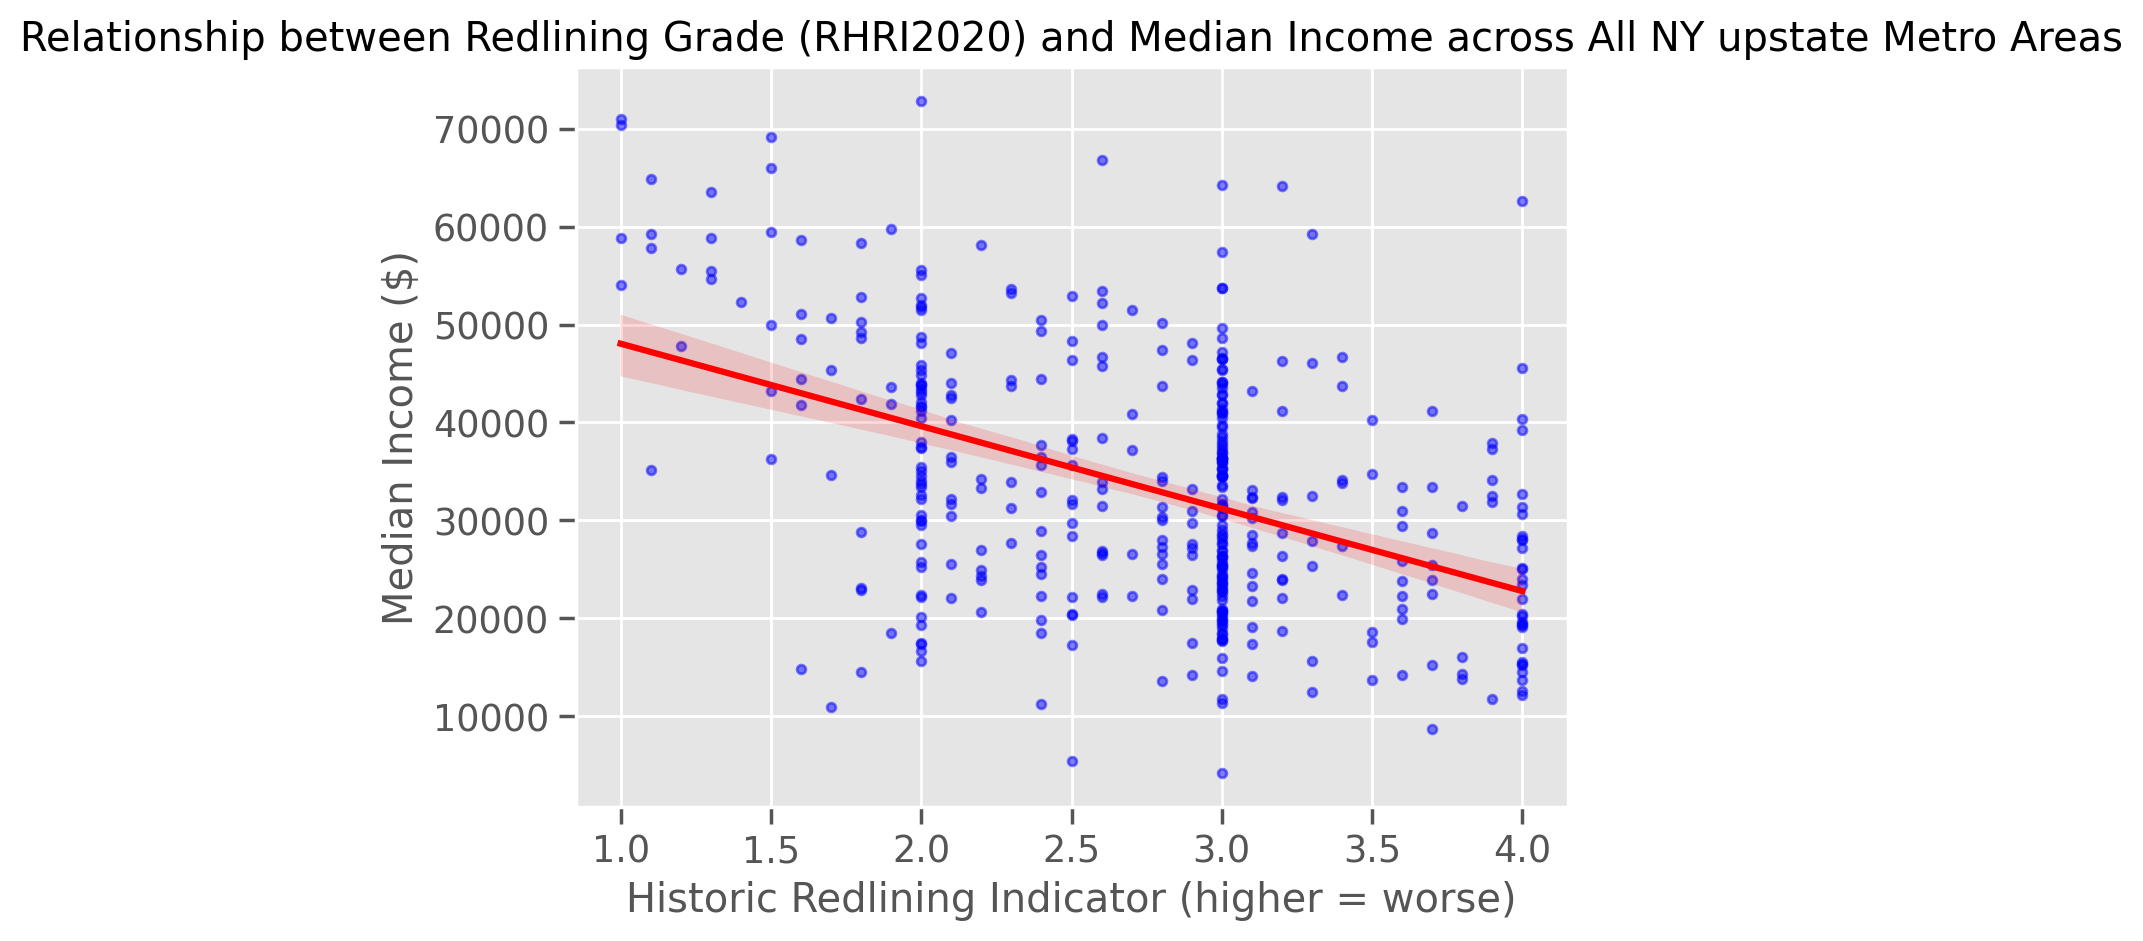

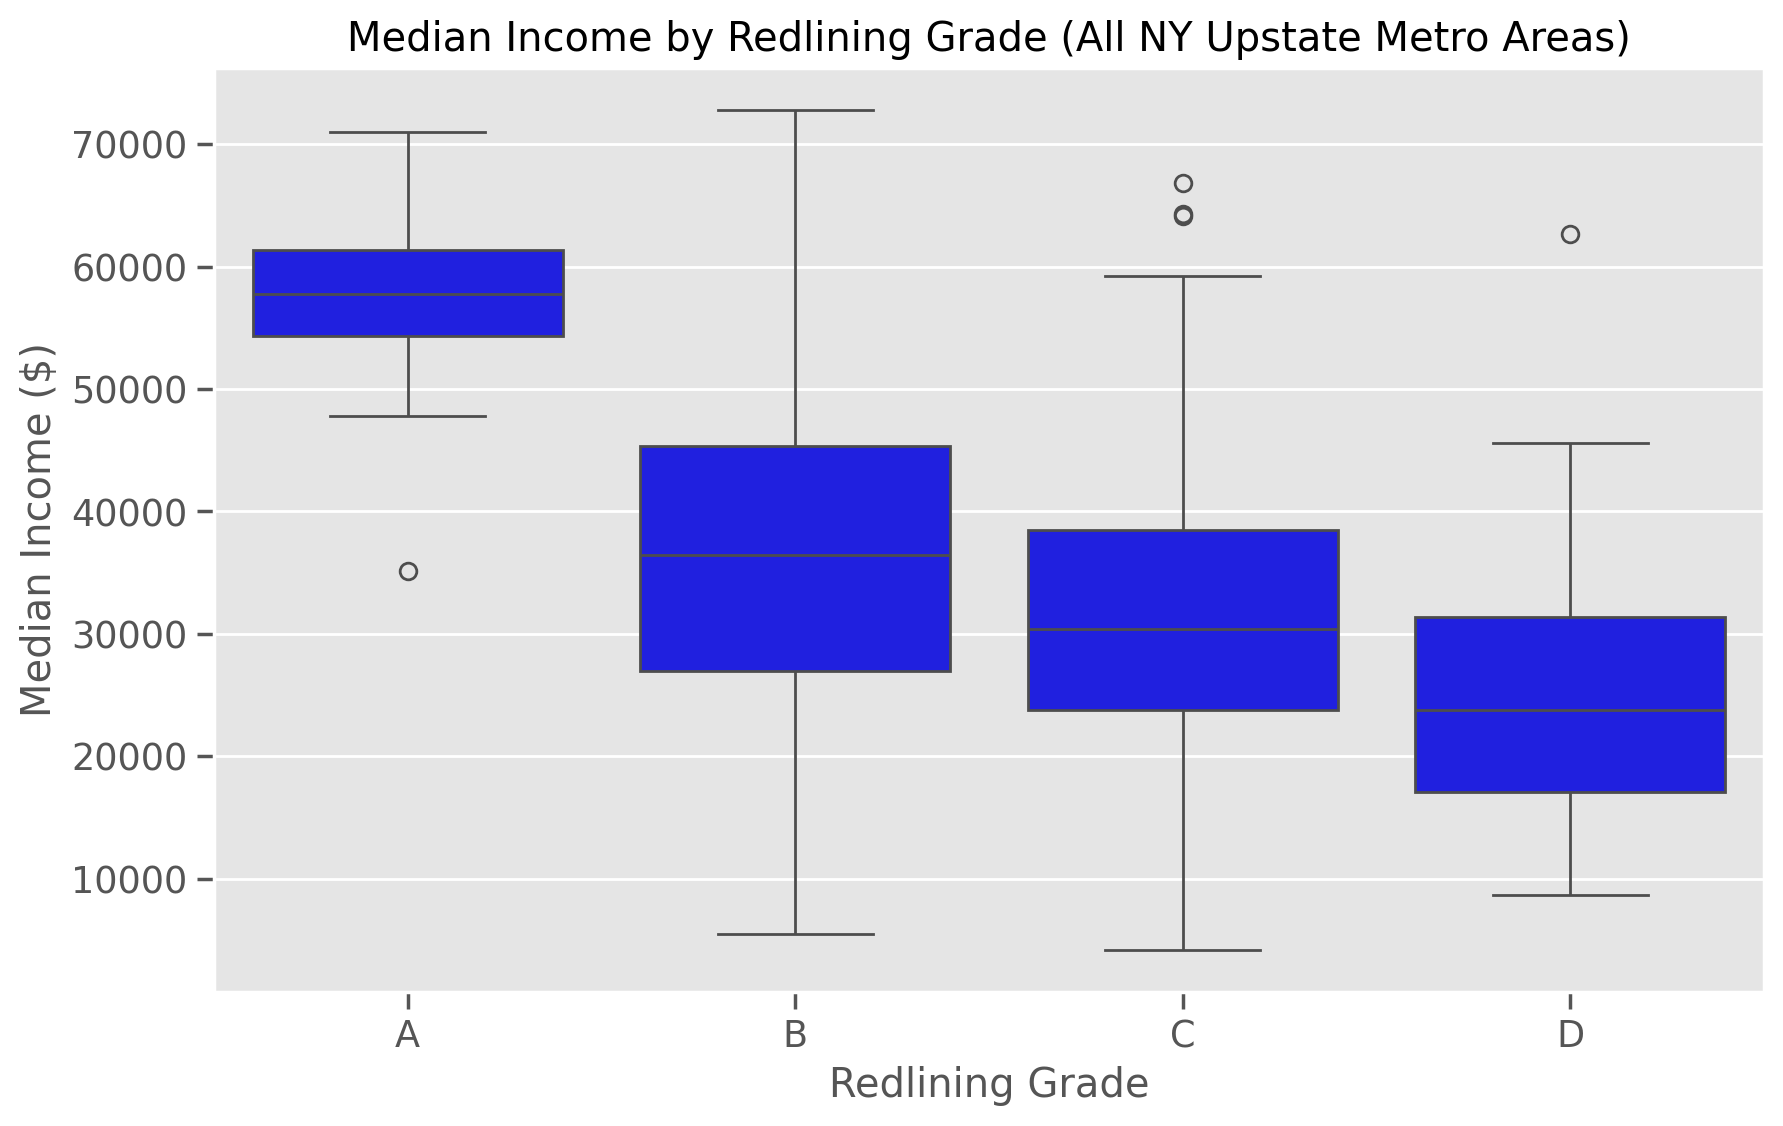

In [ ]:
# make a scatter plot
sns.regplot(
    data=all_data,
    x="RHRI2020",  # X-axis(Raw data): redlining score (1-4)
    y="median_income",  # Y-axis: median income
    scatter_kws={"s": 10, "alpha": 0.5,"color":"blue"},
    line_kws={"color": "red"},
)
plt.title("Relationship between Redlining Grade (RHRI2020) and Median Income across All NY upstate Metro Areas")
plt.xlabel("Historic Redlining Indicator (higher = worse)")
plt.ylabel("Median Income ($)")
plt.savefig("overall_redlining_income_relationship.png")
plt.show()
# make a box plot to compare income distributions by labels(A-B-C-D grades)
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=all_data, x="Grade", y="median_income", order=["A", "B", "C", "D"],color="blue")
plt.title("Median Income by Redlining Grade (All NY Upstate Metro Areas)")
plt.xlabel("Redlining Grade")
plt.ylabel("Median Income ($)")
plt.savefig("redlining_income_boxplot_by_grade.png")
plt.show()

It is thus evident that in 2023, the shadow of redlining still looms over our research site in upstate New York.
But, how does redlining affect disparities across different regions?

## Step 2:Consumer Access to Licensed Dispensaries in the Shadow of Redlining

In [ ]:
# Define HOLC grade color scheme
grade_colors = {
    "A": "#1a9850",
    "B": "#91cf60",
    "C": "#fc8d59",
    "D": "#d73027"
}

In [ ]:
joined_gdf_dropped["Grade"] = joined_gdf_dropped["RHRI2020"].apply(map_rhri_to_grade)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
#joined_gdf_dropped

In [ ]:
# Calculate dispensary count by grade
dispensary_counts = joined_gdf_dropped["Grade"].value_counts().sort_index()
dispensary_counts

,count
Grade,
A,1
B,28
C,40
D,17


In [ ]:
# Project to coordinate system suitable for area calculation
# We use EPSG:26918 because it converts Earth's curved latitude/longitude coordinates into flat meters, allowing accurate area measurements for New York.
# This ensures our density calculations (dispensaries per square kilometer) are correct
filtered_hri_gdf_projected = filtered_hri_gdf.to_crs("EPSG:26918")  # UTM zone 18N for New York

In [ ]:
# Add Grade column using the same mapping function
filtered_hri_gdf_projected["Grade"] = filtered_hri_gdf_projected["RHRI2020"].apply(map_rhri_to_grade)

In [ ]:
#filtered_hri_gdf_projected

In [ ]:
# Calculate area for each region (square kilometers)
filtered_hri_gdf_projected["area_sq_km"] = filtered_hri_gdf_projected.geometry.area / 1000000

In [ ]:
# Calculate total area by grade
area_by_grade = filtered_hri_gdf_projected.groupby("Grade")["area_sq_km"].sum()
area_by_grade = area_by_grade.reindex(["A", "B", "C", "D"], fill_value=0)

In [ ]:
print("Total area by HOLC grade (square kilometers):")
print(area_by_grade)

Total area by HOLC grade (square kilometers):
Grade
A     42.330468
B    237.542066
C    320.021833
D     76.439430
Name: area_sq_km, dtype: float64


In [ ]:
# Calculate dispensary density by grade
density_by_grade = pd.Series(0.0, index=["A", "B", "C", "D"])
for grade in ["A", "B", "C", "D"]:
    if area_by_grade[grade] > 0:
        density_by_grade[grade] = dispensary_counts[grade] / area_by_grade[grade]
density_by_grade.name = "density_per_sq_km"

In [ ]:
print("Dispensary density by HOLC grade (per square kilometer):")
print(density_by_grade)
# the SSE program started in 2021(), the program need to grow up!

Dispensary density by HOLC grade (per square kilometer):
A    0.023624
B    0.117874
C    0.124991
D    0.222398
Name: density_per_sq_km, dtype: float64


In [ ]:
# Create dataframe for plot
comparison_df = pd.DataFrame({
    "Grade": ["A", "B", "C", "D"],
    "Dispensary_Count": dispensary_counts.values,
    "Total_Area_sq_km": area_by_grade.values,
    "Density_per_sq_km": density_by_grade.values
})

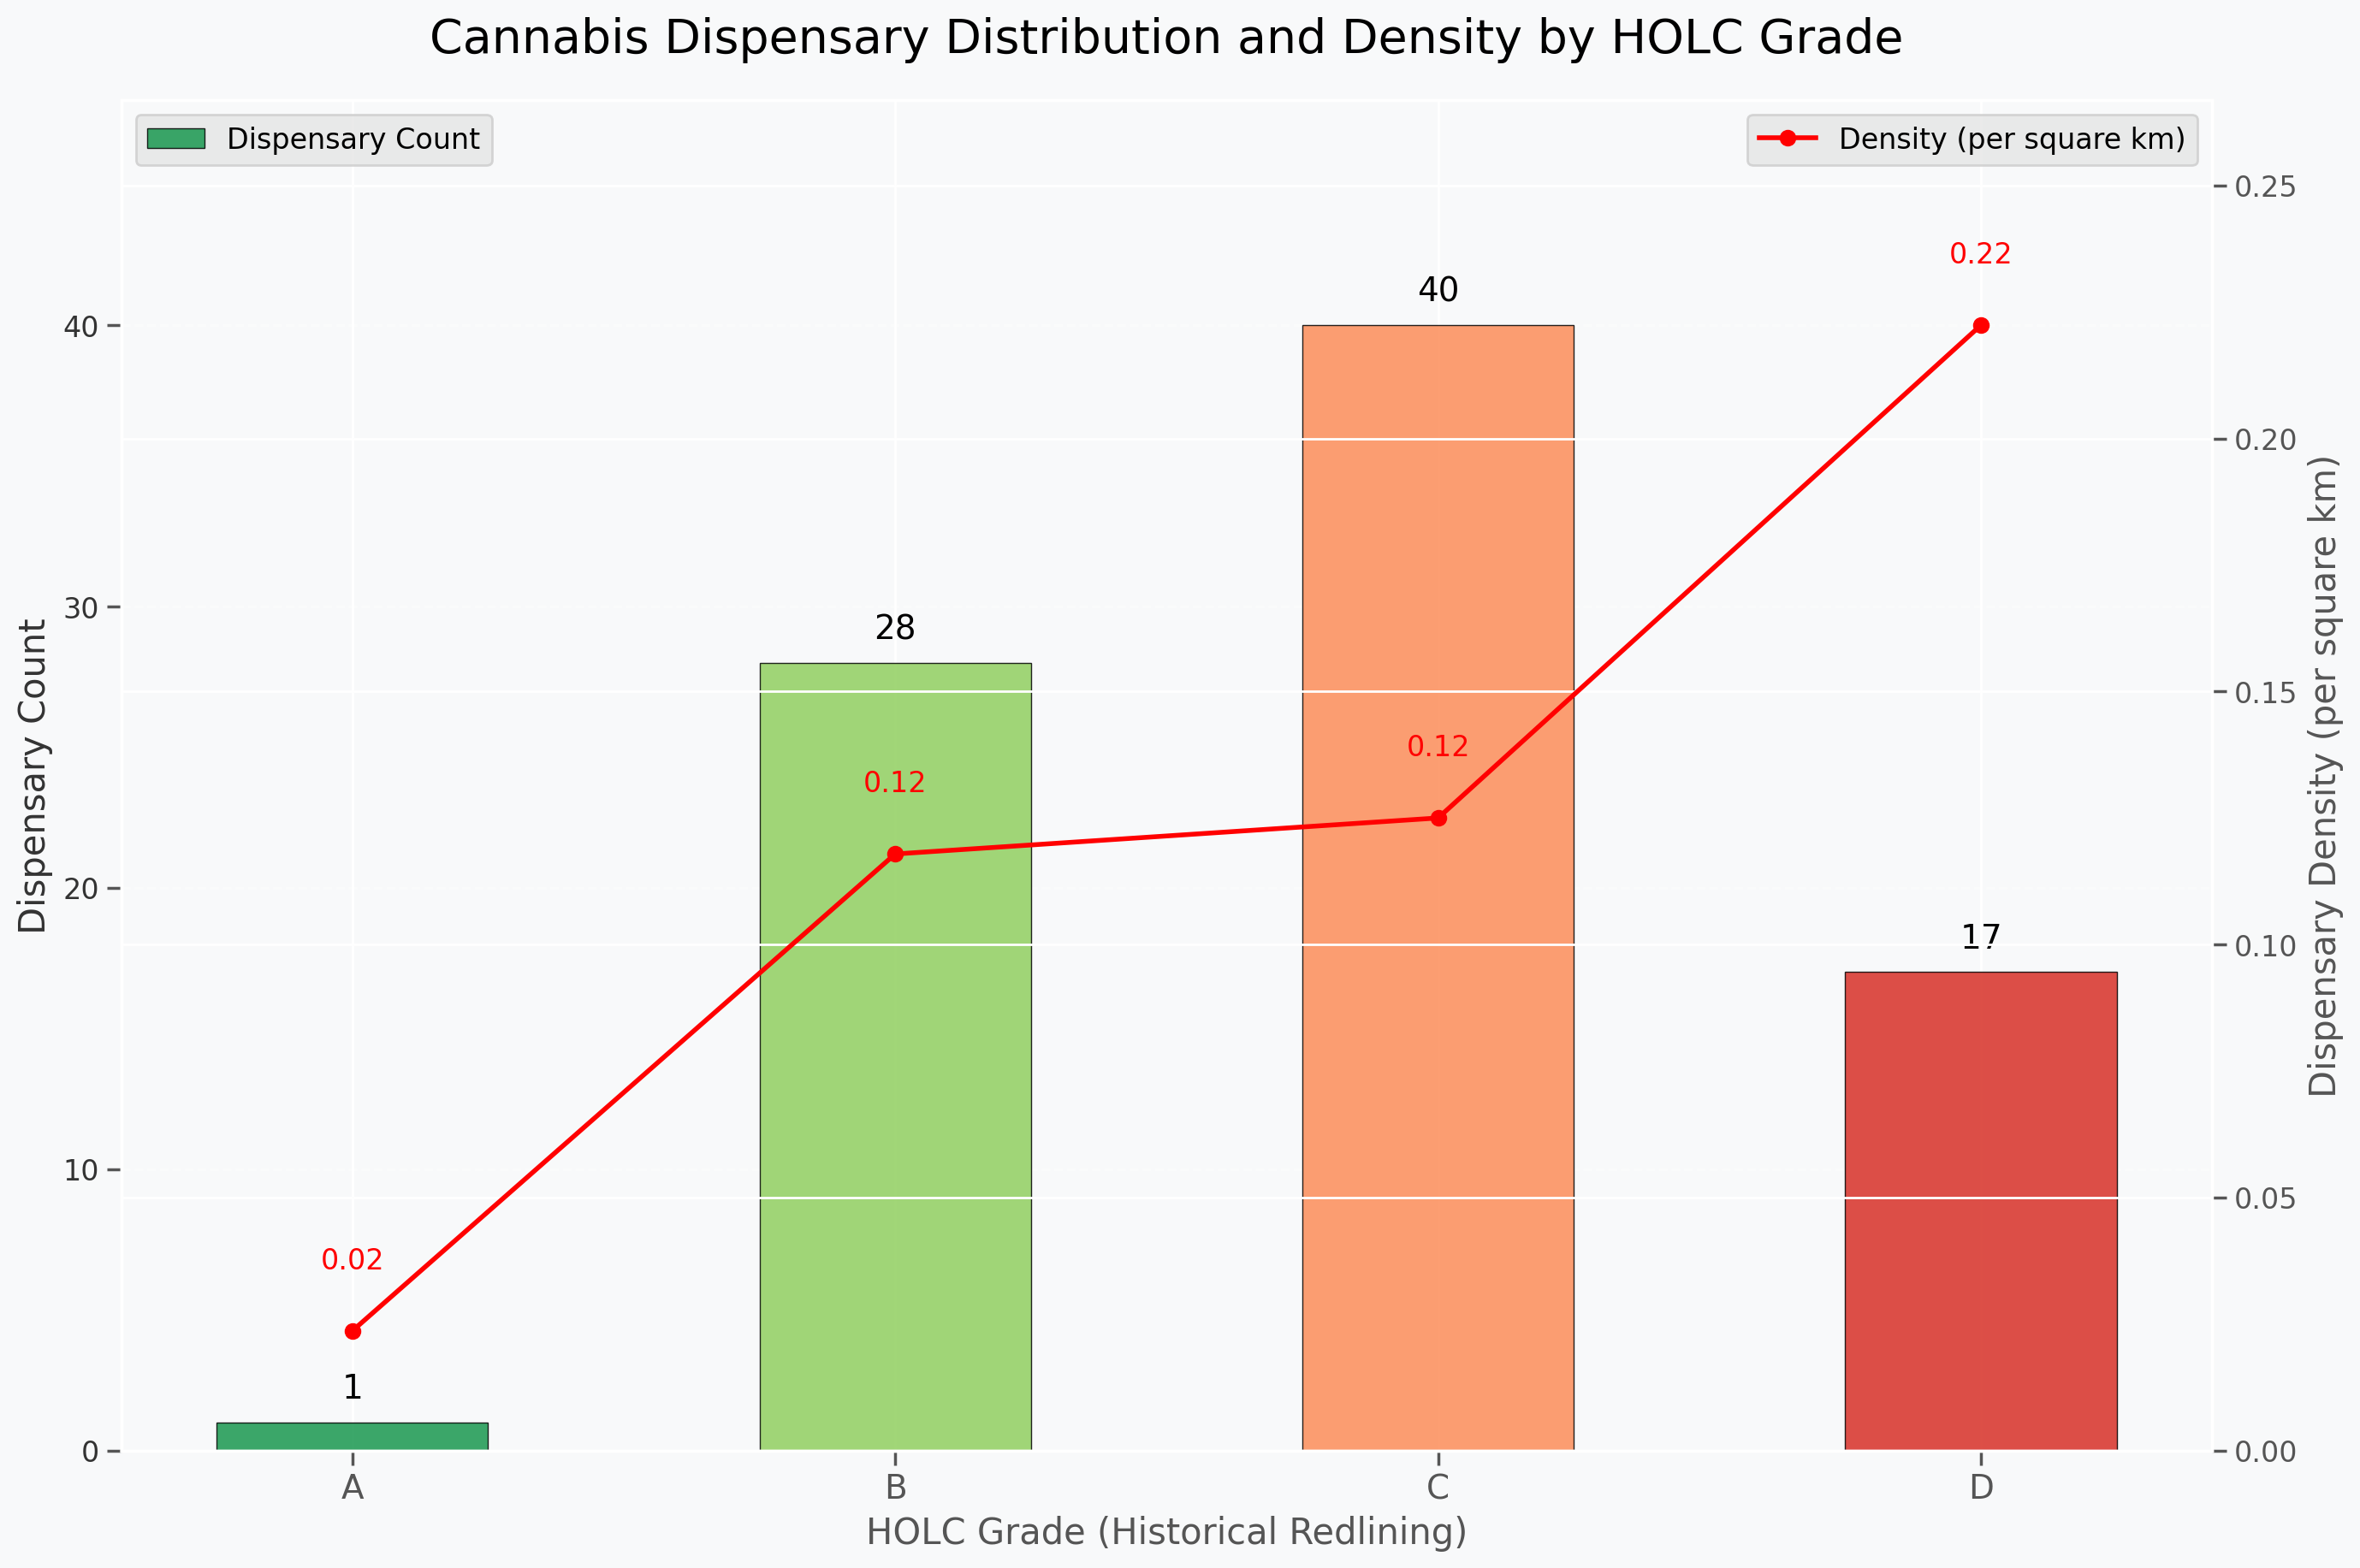

Dispensary count and density comparison by HOLC grade:
  Grade  Dispensary_Count  Total_Area_sq_km  Density_per_sq_km
0     A                 1         42.330468           0.023624
1     B                28        237.542066           0.117874
2     C                40        320.021833           0.124991
3     D                17         76.439430           0.222398


In [ ]:
# Create combined visualization
# Set background style
fig, ax1 = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#f8f9fa')
ax1.set_facecolor('#f8f9fa')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Create dispensary count bar chart
bars = ax1.bar(
    comparison_df["Grade"],
    comparison_df["Dispensary_Count"],
    color=[grade_colors[grade] for grade in comparison_df["Grade"]],
    width=0.5,
    alpha=0.85,
    edgecolor='black',
    linewidth=0.5,
    label='Dispensary Count'
)

# Add count labels on each bar
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.6,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=14
    )

# Add first y-axis label
ax1.set_xlabel('HOLC Grade (Historical Redlining)', fontsize=15)
ax1.set_ylabel('Dispensary Count', fontsize=15, color='#333333')
ax1.tick_params(axis='y', labelcolor='#333333', labelsize=12)
ax1.tick_params(axis='x', labelsize=14, rotation=0)

# Adjust Y-axis limit to ensure enough space for labels
max_count = max(comparison_df["Dispensary_Count"])
ax1.set_ylim(0, max_count * 1.2)

# Create second y-axis for density
ax2 = ax1.twinx()
line = ax2.plot(
    comparison_df["Grade"],
    comparison_df["Density_per_sq_km"],
    'o-',
    color='red',
    linewidth=2,
    markersize=6,
    label='Density (per square km)'
)

# Add density value labels on the line
for i, density in enumerate(comparison_df["Density_per_sq_km"]):
    ax2.text(
        i,
        density + max(comparison_df["Density_per_sq_km"]) * 0.05,
        f'{density:.2f}',
        ha='center',
        va='bottom',
        fontsize=12,
        color='red'  # Changed to red to match the line
    )

# Add second y-axis label
ax2.set_ylabel('Dispensary Density (per square km)', fontsize=15)
ax2.tick_params(axis='y',labelsize=12)

# Adjust second Y-axis limit
ax2.set_ylim(0, max(comparison_df["Density_per_sq_km"]) * 1.2)

# Add title
plt.title('Cannabis Dispensary Distribution and Density by HOLC Grade', fontsize=20, pad=20)

# Create standard legend
ax1.legend(['Dispensary Count'], loc='upper left', fontsize=12)
ax2.legend(['Density (per square km)'], loc='upper right', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])

plt.savefig('holc_dispensary_distribution_combined.png', dpi=300, bbox_inches='tight')

plt.show()

print("Dispensary count and density comparison by HOLC grade:")
print(comparison_df)

## Personal supplement

QUESTION:
While we observe more dispensaries in historically redlined (D) areas, could this be masking
continued inequality? Are dispensaries in these areas primarily located in relatively
wealthier parts, creating a "cream layer
" effect?


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
from census import Census

In [ ]:
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)

In [ ]:
# Filter for C and D graded areas in our data
c_d_areas = filtered_hri_gdf[filtered_hri_gdf["RHRI2020"].isin([3, 4])]
c_d_areas["Grade"] = c_d_areas["RHRI2020"].apply(map_rhri_to_grade)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Identify which C and D areas have dispensaries
joined_c_d = joined_gdf_dropped[joined_gdf_dropped["Grade"].isin(["C", "D"])]
areas_with_dispensaries = set(joined_c_d["GEOID20"].unique())

In [ ]:
# Indicate areas with dispensaries
c_d_areas["has_dispensary"] = "No"
for idx, row in c_d_areas.iterrows():
    if row["GEOID20"] in areas_with_dispensaries:
        c_d_areas.at[idx, "has_dispensary"] = "Yes"

disp_counts = c_d_areas["has_dispensary"].value_counts()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Join with economic data (median income)
c_d_with_econ = c_d_areas.copy()
c_d_with_econ = c_d_with_econ.set_index("GEOID20")
c_d_with_econ = c_d_with_econ.join(median_income_df[["median_income"]], how="left")
c_d_with_econ = c_d_with_econ.reset_index()

In [ ]:
# Clean up any missing values
c_d_with_econ = c_d_with_econ.dropna(subset=["median_income"])

In [ ]:
# Get Gini coefficient data from the Census API
census = Census("", year=2023)

In [ ]:
counties = set(c_d_areas["GEOID20"].str.slice(0, 5))

In [ ]:
# Get Gini coefficient data
gini_data_raw = []
for county_fips in counties:
    try:
        county_data = census.acs5.get(
            ("B19083_001E",),  # Gini Index
            geo={"for": "tract:*", "in": f"state:{county_fips[:2]} county:{county_fips[2:]}"},
        )
        gini_data_raw.extend(county_data)
    except Exception as e:
        print(f"Error getting data for county {county_fips}: {e}")

In [ ]:
# Create a dataframe and rename columns
gini_df = pd.DataFrame(gini_data_raw)
gini_df = gini_df.rename(columns={"B19083_001E": "gini_index"})

In [ ]:
# Create GEOID by combining state, county, and tract codes
gini_df["GEOID20"] = gini_df["state"] + gini_df["county"] + gini_df["tract"]

In [ ]:
# Convert to numeric values
gini_df["gini_index"] = pd.to_numeric(gini_df["gini_index"])

In [ ]:
# make sure the Gini index from ACS is scaled 0-1
gini_df = gini_df[(gini_df["gini_index"] >= 0) & (gini_df["gini_index"] <= 1)]

In [ ]:
# Join economic data (including both income and Gini) with our C and D areas
# First join the Gini data to our existing dataframe with income
c_d_with_econ = c_d_with_econ.merge(
    gini_df[["GEOID20", "gini_index"]],
    on="GEOID20",
    how="left"
)

# Clean up any missing values
c_d_with_econ = c_d_with_econ.dropna(subset=["gini_index", "median_income"])

In [ ]:
# c_d_with_econ

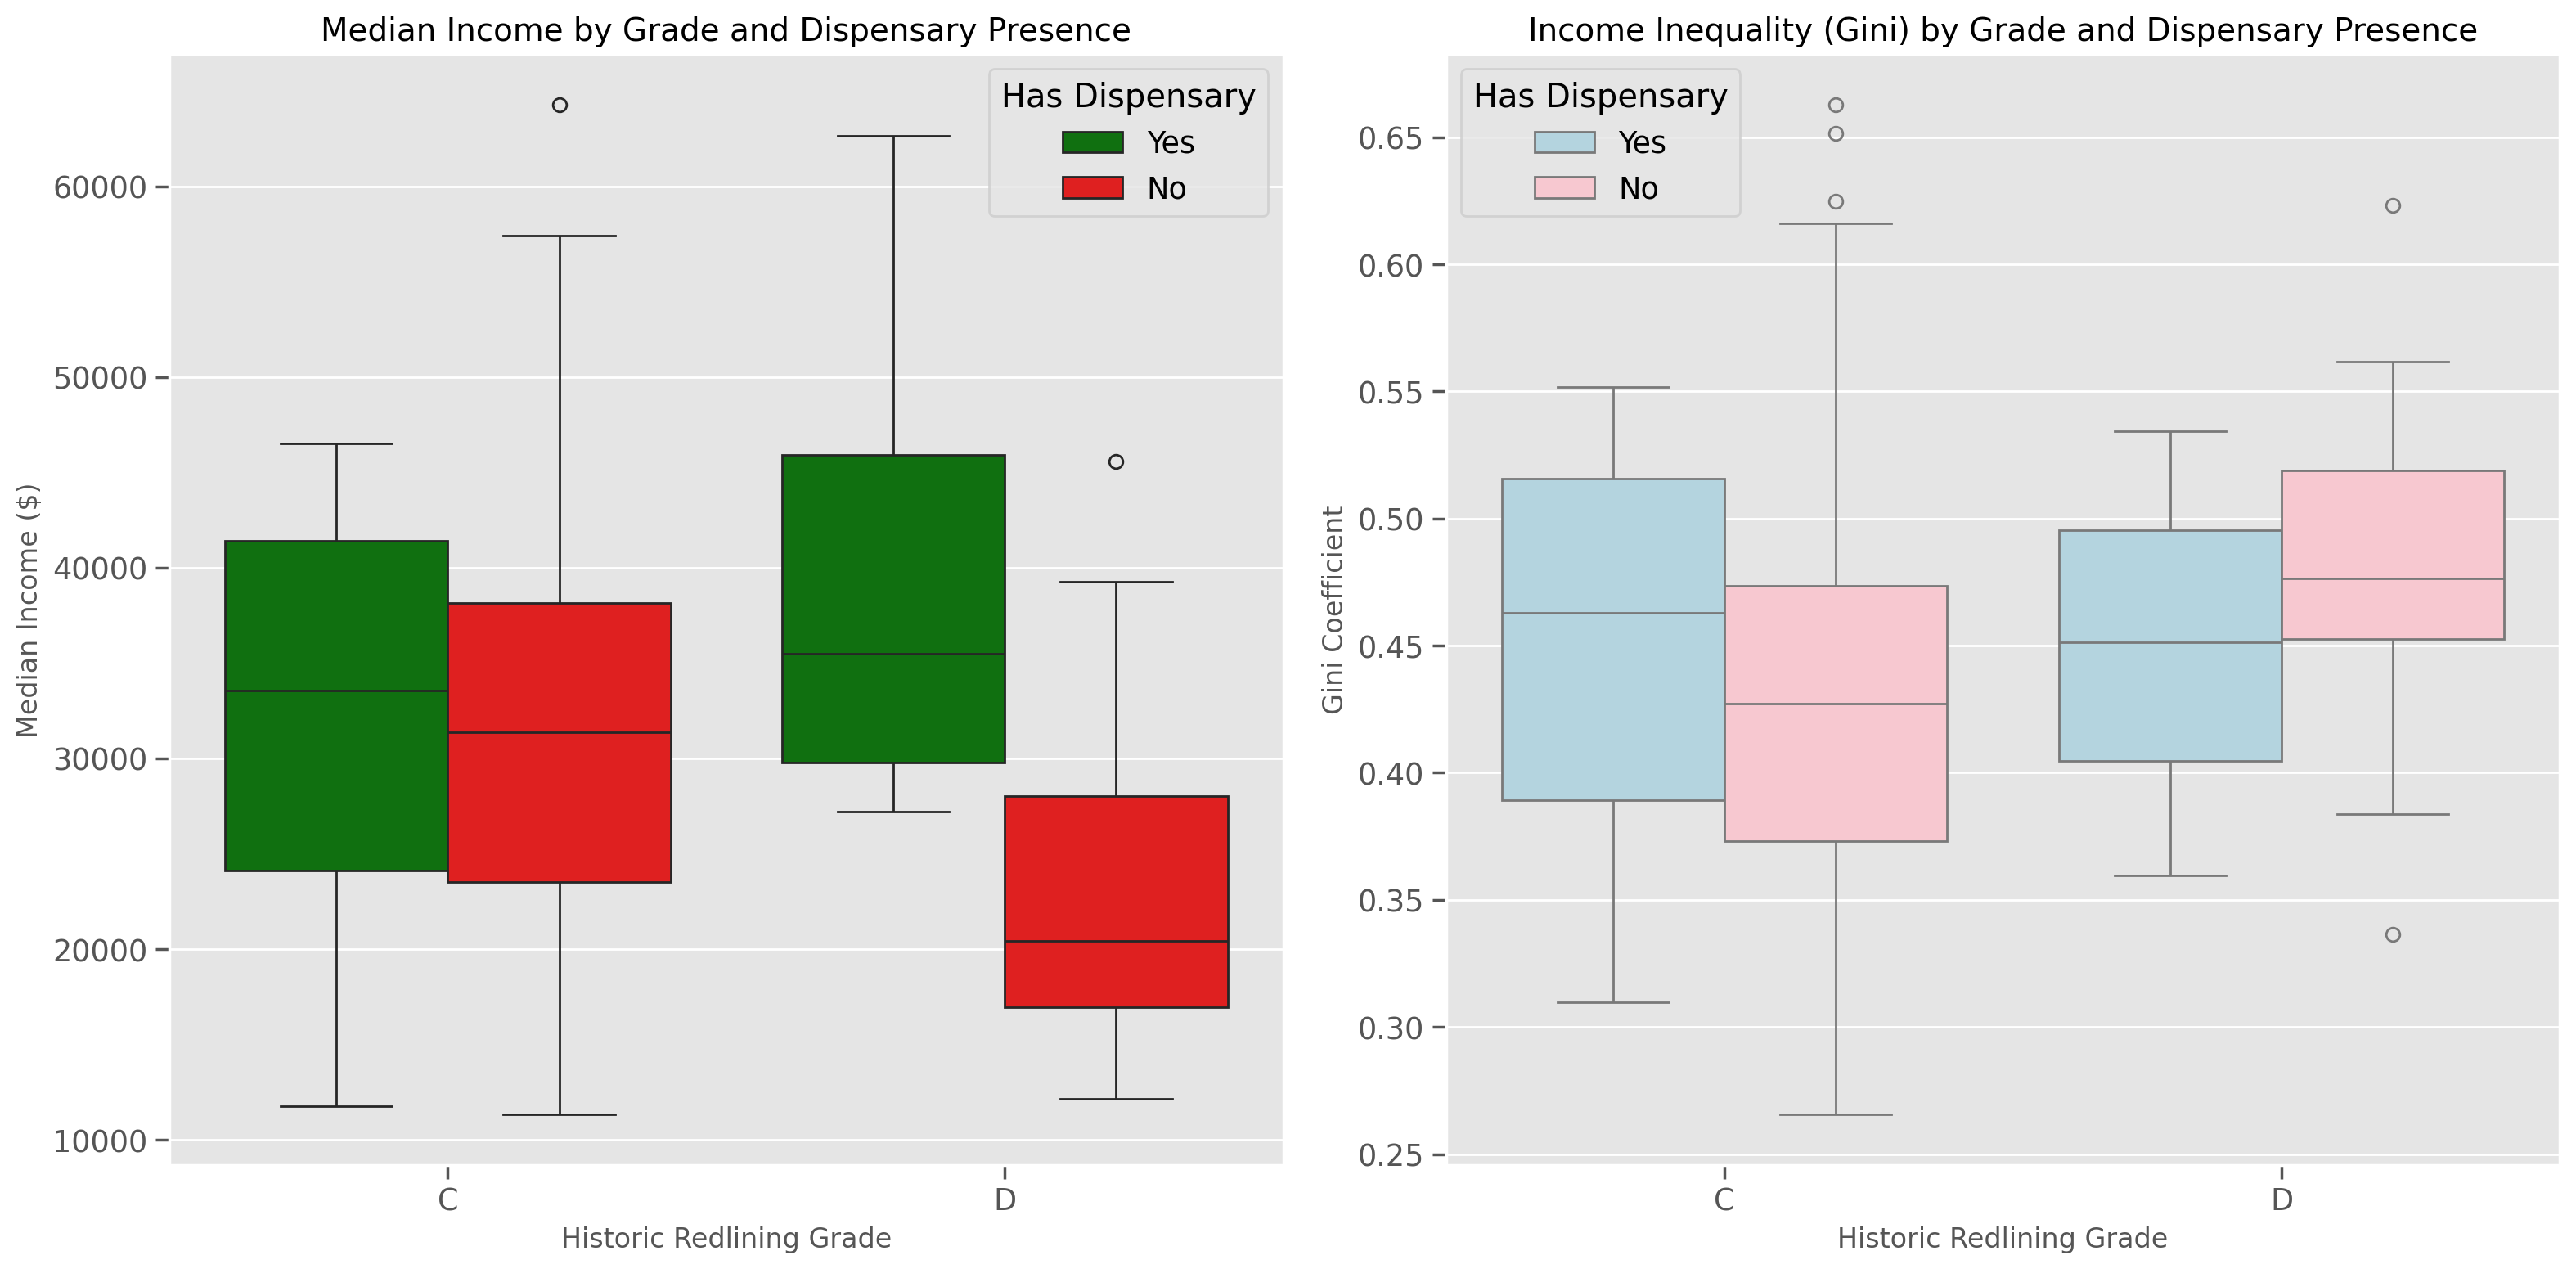

In [ ]:
# Combined median income and Gini coefficient box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Median Income Box Plot
sns.boxplot(
    data=c_d_with_econ,
    x="Grade",
    y="median_income",
    hue="has_dispensary",
    palette={"Yes": "green", "No": "red"},
    ax=ax1
)
ax1.set_title("Median Income by Grade and Dispensary Presence", fontsize=14)
ax1.set_xlabel("Historic Redlining Grade", fontsize=12)
ax1.set_ylabel("Median Income ($)", fontsize=12)
ax1.legend(title="Has Dispensary")

# Gini Coefficient Box Plot
sns.boxplot(
    data=c_d_with_econ,
    x="Grade",
    y="gini_index",
    hue="has_dispensary",
    palette={"Yes": "lightblue", "No": "pink"},
    ax=ax2
)
ax2.set_title("Income Inequality (Gini) by Grade and Dispensary Presence", fontsize=14)
ax2.set_xlabel("Historic Redlining Grade", fontsize=12)
ax2.set_ylabel("Gini Coefficient", fontsize=12)
ax2.legend(title="Has Dispensary")

plt.tight_layout()
plt.savefig("combined_income_gini_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()